# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Tentang Dataset

**Sumber Dataset**
* Dataset yang digunakan bersumber dari public repository yaitu **Kaggle**
* Dataset berisi data harga perumahan di tangerang yang di peroleh dari website "Rumah.com"

**Isi Data**

* Dataset berisikan : **29420 baris** data harga rumah di tangerang
* dengan **7 kolom** yaitu :
    
    **Kategorikal**
    
    * nav-link href : link penjualan rumah
    
    * listing location : lokasi rumah yang dijual
    
    * listing-florarea : luas tanah
    
    * listing-florarea 2 : luas tanah permeter
    
    **Numerikal**
    
    * price : harga dari rumah yang dijual
    
    * bed : jumlah kamar tidur
    
    * bath : jumlah kamar mandi



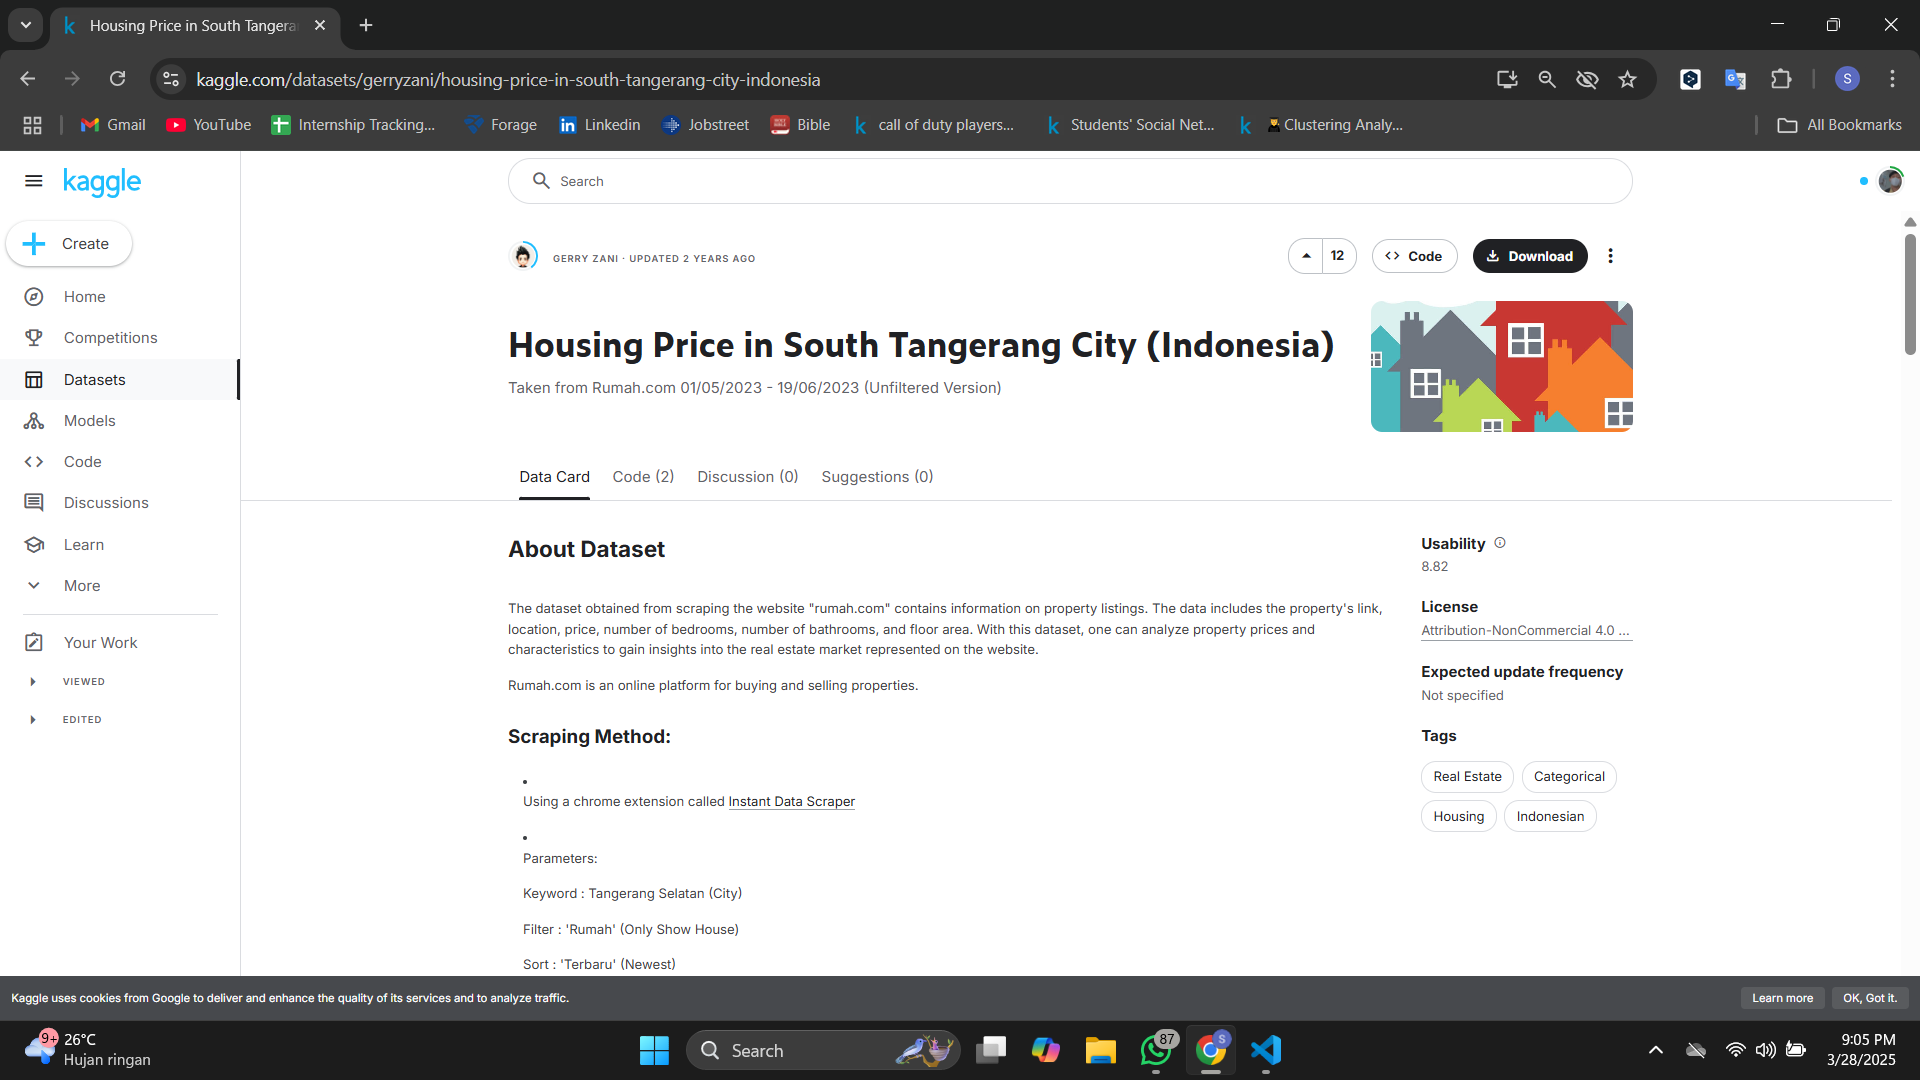

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('Dataset/Dataset_inisiasi.csv', encoding='latin1')

In [ ]:
df

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

**Isi Data**

* Dataset berisikan : **29420 baris** data harga rumah di tangerang
* dengan **7 kolom** yaitu :
    
    **Kategorikal**
    
    * nav-link href : link penjualan rumah
    
    * listing location : lokasi rumah yang dijual
    
    * listing-florarea : luas tanah
    
    * listing-florarea 2 : luas tanah permeter
    
    **Numerikal**
    
    * price : harga dari rumah yang dijual
    
    * bed : jumlah kamar tidur
    
    * bath : jumlah kamar mandi


In [ ]:
print('jumlah data duplikat : ' , df.duplicated().sum())

In [ ]:
print('jumlah data null/kosong : ')
df.isna().sum()

In [ ]:
df.describe(include='all')

In [ ]:
dist_kamar = df['bed'].value_counts().sort_values()
# Distribusi Jumlah Kamar
plt.figure(figsize=(12, 6))
sns.barplot(
    x = dist_kamar.index,
    y = dist_kamar.values,
    color= 'orange'
)
plt.title('Distribusi Jumlah Kamar', fontsize = 15)
plt.xlabel("Jumlah kamar")
plt.ylabel("Jumlah")
plt.show()

print(dist_kamar)

In [ ]:
dist_kamarmandi = df['bath'].value_counts().sort_values()
# Distribusi Jumlah kamarmandi
plt.figure(figsize=(12, 6))
sns.barplot(
    x = dist_kamarmandi.index,
    y = dist_kamarmandi.values,
    color= 'orange'
)
plt.title('Distribusi Jumlah kamar mandi', fontsize = 15)
plt.xlabel("Jumlah kamar mandi")
plt.ylabel("Jumlah")
plt.show()

print(dist_kamarmandi)

**Profile data sementara :**
1. Terdapat 5241 baris data duplikat -> drop
2. Terdapat 138 null value di kolom kamar tidur, 205 di kolom kamar mandi & 37 di kolom harga permeter
3. kolom **lokasi_rumah** : terdapat 8495 lokasi penjualan rumah yang unik / bisa di katakan 8495 tempat berbeda - kolom ini akan di pisah (kecamatan, kabupaten, provinsi)
4. **harga** :  harga rumah paling sering muncul 3,5 miliar (631), dan ada 2116 harga berbeda
5. **jumlah_kamar** : jumlah kamar pada data memiliki rentang  1 - 10 kamar
6. **jumlah_kamarmandi** : jumlah kamar mandi pada data memiliki rentang  1 - 10 kamar
7. **luas_tanah** : luas tanah paling sering muncul 200m persegi (1349) 
7. **harga_permeter** : harga permeter paling sering muncul 20 juta per meter persegi



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**0. Rename kolom supaya mudah dibaca**

In [ ]:
# Ganti Nama Kolom supaya lebih mudah dibaca
df = df.rename(columns={'nav-link href': 'link_penjualan', 'listing-location' : 'lokasi_rumah', 
                        'price' : 'harga', 'bed' : 'jumlah_kamar', 'bath' : 'jumlah_kamarmandi', 'listing-floorarea': 'luas_tanah', 'listing-floorarea 2': 'harga_permeter'})

**1. Handling Duplicate Values**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

**2. Handling Null Values**

*Karena null values hanya sedikit maka kita drop saja*

In [ ]:
df.dropna(inplace=True)

*Cek kembali*

In [ ]:
df.isna().sum()

In [ ]:
df.describe(include='all')

***- okey data sudah bersih dari duplikat dan null sekarang manipulasi data per kolom***

**Manipulasi Kolom**

**1. Handling Kolom lokasi_rumah**

Bintaro, Tangerang Selatan, Banten -> bagi menjadi kecamatan kabupaten provinsi

In [ ]:
df

**- Ambil 3 kata terakhir pada kolom lokasi_rumah untuk mendapatkan kecamatan, kabupaten, dan provinsi**

In [ ]:
# Pisahkan berdasarkan koma
df['split_lokasi'] = df['lokasi_rumah'].str.split(', ')

# Ambil 3 bagian terakhir (apapun panjangnya)
df['split_lokasi'] = df['split_lokasi'].apply(lambda x: x[-3:] if len(x) >= 3 else [None] * (3 - len(x)) + x)

# Ubah list jadi DataFrame dengan apply(pd.Series)
df[['kecamatan', 'kabupaten', 'provinsi']] = df['split_lokasi'].apply(pd.Series)

# Hapus kolom yang tidak perlu dan ganti nilai kosong dengan NaN
df = df.drop(columns=['split_lokasi']).fillna(np.nan)

# Cek hasilnya
df.head()

**2. Handling Harga dari object menjadi numerik**

In [ ]:
# Filter harga yang mengandung "jt" (jutaan)
df_juta = df[df['harga'].str.contains('(?i)jt', regex=True)]

# Hitung jumlah data rumah jutaan
print('Rumah Jutaan Ada:', df_juta.shape[0], 'Rumah')

In [ ]:
df_miliar = df[df['harga'].str.contains('(?i) M', regex=True)]
print('Rumah Miliaran Ada:', df_miliar.shape[0], 'Rumah')


karena data masih objek jadi nanti gabisa digunakan lebih lanjut, jadi kita cek dulu ada berapa harga rumah yang jutaan dan miliaran sebelum kita convert ke numerik

1. Rumah Jutaann ada : **3763 Rumah**
2. Rumah Miliaran : **20126 Rumah**

In [ ]:
def convert_to_numeric(harga):
    harga = harga.lower().replace(',', '.')  # Ubah koma ke titik
    if 'jt' in harga:
        return float(harga.replace(' jt', '')) * 1_000_000  # Jutaan
    elif 'm' in harga:
        return float(harga.replace(' m', '')) * 1_000_000_000  # Miliaran
    return None  # Kalau format tidak dikenali

# Terapkan ke dataframe
df['harga'] = df['harga'].apply(convert_to_numeric)

In [ ]:
df

In [ ]:
df.info()

* *kolom harga sudah menjadi tipe data numerik*

In [ ]:
df.describe(include='all')

* Cek distribusi Harga Rumah

In [ ]:
df['harga'] = df['harga'].astype(float)

# Plot histogram
plt.figure(figsize=(10,5))
sns.histplot(df['harga'], bins=20, kde=True)
plt.xlabel("Harga Rumah (Rp)")
plt.ylabel("Jumlah Properti")
plt.title("Distribusi Harga Rumah")
plt.show()


* harga rumah terdistribusi miring ke kiri & tidak distribusi normal

**Cek harga paling tinggi & paling rendah untuk di analisis**

In [ ]:
print("Max:", df['harga'].max())
print("Min:", df['harga'].min())
print(df['harga'].describe())

* dapat dilihat pada data di atas, rumah paling rendah harganya adalah **satu jutaan** (kemungkinan ada kesalahan dalam processing sebelumnya) & yang paling tinggi adalah **850 miliar**

**Cek outlier pada data dengan IQR**

In [ ]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Jumlah Outlier: {((df['harga'] < lower_bound) | (df['harga'] > upper_bound)).sum()}")


**Karena nilai iqr tidak wajar, jadi kita gunakan log transormation pada kolom harga untuk cek ulang outlier**

In [ ]:
df["harga_log"] = np.log1p(df["harga"])

In [ ]:
Q1 = df['harga_log'].quantile(0.25)
Q3 = df['harga_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Jumlah Outlier: {((df['harga_log'] < lower_bound) | (df['harga_log'] > upper_bound)).sum()}")


**dapat dilihat setalah menggunakan log tranformation, outlier menjadi 339, kita drop saja , karena jika tidak nanti clustering akan susah memisahkan data yang rentangnya sangat jauh dari distribusi normal (guassian)**

In [ ]:
df = df[(df['harga_log'] >= lower_bound) & (df['harga_log'] <= upper_bound)]

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram harga
sns.histplot(df["harga"], bins=50, kde=True, color="blue")

plt.xscale("log")  # Menggunakan log scale agar distribusi harga lebih jelas
plt.xlabel("Harga (IDR)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Harga Properti")
plt.show()

**Distribusi data sudah lebih mendingan daripada yang awal**

In [ ]:
df.describe()

**ok dapat dilihat sekarang data harga rumah cukup normal ya teman teman berada pada rentang  250 jutaan - 24 miliar**

**3. Handling Kolom Luas Tanah**

In [ ]:
df['luas_tanah'] = df['luas_tanah'].str.replace('m²', '', regex=True).str.strip() # Ganti m2 jadi string kosong
df['luas_tanah'] = pd.to_numeric(df['luas_tanah'], errors='coerce') #convert tipe data jadi numerik

In [ ]:
df

ok manipulasi kolom semuanya sudah beres

*notes : karena harga permeter tidak menjadi patokan untuk modelling, jadi saya biarkan saja ya ges hehe.*

**Cek Ulang Data**

Berikutnya adalah kita cek ulang datanya dan lihat distribusi datanya juga

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

*hmm sepertinya ada data anomali yang ada di kolom luas tanah*

In [ ]:
df[df['luas_tanah'] <= 100000].sort_values(by='luas_tanah', ascending= False)

**cek distribusi luas tanah dan harganya**

In [ ]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    data= df,
    x ='harga',
    y= 'luas_tanah',
    color = 'orange'
)
plt.xlabel("Harga")
plt.ylabel("Luas Tanah")
plt.show()

In [ ]:
df['luas_tanah'].nlargest(10)

In [ ]:
df[df['luas_tanah'] == 400000]

In [ ]:
df[df['luas_tanah'] == 3000]

ok sepertinya masih ada data yang tidak normal, yang bener aja masa ada jualan rumah luas tanah 400 ribu meter persegi dengan harga 3m saja :D, berdasarkan visual yang ditampilkan dan data yang saya telusuri, saya akan menghapus data yang luas tanahnya lebih dari 3000 meter persegi 

In [ ]:
df = df[df['luas_tanah'] <= 3000]

In [ ]:
# Plot histogram
plt.figure(figsize=(10,5))
sns.histplot(df['luas_tanah'], bins=20, kde=True)
plt.xlabel("Luas Tanah (M2)")
plt.ylabel("Jumlah Properti")
plt.title("Distribusi Luas Tanah")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['luas_tanah'], df['harga'], alpha=0.3, c=df['harga'], cmap='viridis', edgecolor='k')

plt.xlabel("Luas Tanah (m²)")
plt.ylabel("Harga (IDR)")
plt.title("Scatter Plot Harga vs Luas Tanah")

plt.colorbar(label="Harga (IDR)")  # Menambahkan colorbar untuk harga
plt.grid(True, linestyle="--", alpha=0.5)  # Menambahkan grid agar lebih mudah dibaca
plt.show()


**Mengecek rata-rata harga rumah per kecamatan**

In [ ]:
harga_kecamatan = df.groupby('kecamatan')['harga'].mean().sort_values(ascending= False)

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(
    x= harga_kecamatan.values,
    y =harga_kecamatan.index
)
plt.title('Rata-Rata Harga Rumah per Kecamatan')
plt.xlabel('harga')
plt.ylabel('kecamatam')
plt.show()

harga_kecamatan


okey berdasarkan data harga rata-rata rumah tertinggi adalah di Alam Sutera dengan harga 5,1m :D (kira kira gen z bisa punya rumah ga ya? huhuhu), dan yang paling rendah ada di ciledug dengan rata-rata 800juta

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap Korelasi")
plt.show()


dilihat berdasarkan heatmap korelasi, korelasi antar kolom tertinggi adalah
1. Jumlah kamar & jumlah kamar mandi -> 0,8 --> sangat bergantungan (kemungkinan kolom jumlah kamar saja yang akan digunakan dalam clustering)
2. Luas Tanah & (Jumlah kamar & jumlah kamar mandi) -> 0,64 -> sangat bergantungan 
3. Luas tanah & harga -> 0.81 -> sangat bergantungan

**Encoding Kolom Kategorikal**

In [ ]:
df_copy = df.copy()
df_copy

**- Ambil kolom selain link penjualan dan lokasi rumah untuk pemodelan Clustering**
: *karena kemungkinan tidak akan berpengaruh dalam pemodelan*

In [ ]:
df 

In [ ]:
df_copy = df_copy.iloc[:, 2:11]

In [ ]:
df_copy

In [ ]:
le = LabelEncoder()

for col in df_copy.select_dtypes(include=['object', 'category']).columns:
    df_copy[col] = le.fit_transform(df_copy[col])

In [ ]:
df_copy.sample(10)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**Clustering akan menggunakan Algoritma Kmeans, oleh karena itu kita perlu import Kmeans terlebih dahulu, dan hasilnya akan ada di section berikutnya**

In [ ]:
inertia = []
K = range(1, 11)  # Coba dari 1 sampai 10 cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_copy)
    inertia.append(kmeans.inertia_)  # Simpan inertia tiap jumlah cluster

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

**1. Elbow Method**

In [ ]:

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


**2. Gunakan Cluster pada Elbow Method dan cek Silhouettte Score**

In [ ]:
optimal_k = 3
kmeans_optimal = KMeans(n_clusters= optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(df_copy)

silhouette_avg = silhouette_score(df_copy, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

**Hasil sudah bagus dengan Silhoute Score mencapai : 0,652, tetapi saya belum melakukan feature scalling untuk datanya dan belum melakukan eksplorasi feature selection. jadi saya akan melakukan eksperimen dan membandingkan semua eksperimen untuk mendapatkan nilai silhouette score terbaik yang akan digunakan untuk pemodelan akhir**

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **Clustering dengan 5 kolom (harga, jumlah_kamar, jumlah_kamarmandi, luas_tanah, kecamatan_encode)**

In [ ]:
features = df_copy.iloc[:, [0,1,2,3,5]]

In [ ]:
features

**1. Clustering dengan features Scalling**

In [ ]:
#Menggunakan Min Max Scaller (Normalisasi) karena data tidak terdistribusi normal
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 🔹 4. Gunakan KElbowVisualizer untuk mencari jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah dinormalisasi
visualizer.show()

# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

**ok malah lebih buruk guys, dibandingkan dengan yang tidak di scalling, mungkin karena rentang jumlah kamar & jumlah kamar mandi tidak terlalu jauh, jadi step selanjutnya adalah mencoba scalling harganya saja**

**2. Clustering dengan features Scalling kolom Harga**

In [ ]:
# Buat salinan data asli
features_scaled = features.copy()  

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga']] = scaler.fit_transform(features[['harga']])  # ✅ Fix indexing

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()


In [ ]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

ok disini sedikit naik ya teman teman Silhouette Score untuk k= 4: 0.608, tapi coba experimen lagi dengan luas tanahnya juga di scalling

**3. Clustering dengan features Scalling kolom Harga & luas_tanah**


In [ ]:
# Buat salinan data asli
features_scaled = features.copy()  

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga','luas_tanah']] = scaler.fit_transform(features[['harga', 'luas_tanah']])  

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()


In [ ]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

hasilnya tidak sebaik yang tidak di scalling dan di scalling harga, tapi mari kita lanjutkan eksperimen 

### **Clustering dengan 4 kolom (harga, jumlah_kamar, luas_tanah, kecamatan_encode)**

In [ ]:
features = features.drop(columns='jumlah_kamarmandi')

In [ ]:
features

**1. Clustering Tanpa Scalling**

In [ ]:
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(features)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Hasilnya sama dengan Clustering pertama yang tanpa di scalling

**2. Clustering dengan Scalling**

In [ ]:
#scalling dulu
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 🔹 4. Gunakan KElbowVisualizer untuk mencari jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah dinormalisasi
visualizer.show()

# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

hasilnya tidak terlalu baik dengan hanya memperoleh Silhouette Score untuk k=4: 0.447

**3. Clustering dengan harga di scalling**

In [ ]:
features

In [ ]:
# Buat salinan data asli
features_scaled = features.copy()  # ✅ Pastikan ini DataFrame

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga']] = scaler.fit_transform(features[['harga']])  # ✅ Fix indexing

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()

In [ ]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Clustering dengan harga saja yang di scalling hasilnya cukup baik daripada semua feature di scalling dengan nilai silhouette score : 0,608 

**4. Clustering dengan harga & luas_tanah di scalling**

In [ ]:
# Buat salinan data asli
features_scaled = features.copy()  # ✅ Pastikan ini DataFrame

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga','luas_tanah']] = scaler.fit_transform(features[['harga', 'luas_tanah']])  # ✅ Fix indexing

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()

In [ ]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Clustering dengan harga dan luas tanah saja yang di scalling hasilnya cukup baik daripada semua feature di scalling tapi lebih buruk dibandingkan dengan harga saja yang di scalling,  dengan nilai silhouette score : 0.551

### **Rekap hasil eksperimen**

**1. Inisiasi Clustering : Menggunakan Semua Features & Elbow Method**

**Silhouette Score** : 0.652

**2. Clustering dengan 5 features (harga , jumlah_kamar, jumlah_kamarmandi, luas_tanah, kecamatan_encode)**

**Silhouette Score :**
- full Scalling : 0.380
- harga scalling : 0.608
- harga & luas_tanah Scalling : 0.482

**3.Clustering dengan 4 features (harga , jumlah_kamar, luas_tanah, kecamatan_encode)**

**Silhouette Score :**
- Tanpa Scalling : 0.652
- full Scalling : 0.447
- harga scalling : 0.608
- harga & luas_tanah Scalling : 0.551

In [ ]:
df_copy

### **Kesimpulan Clustering**
dengan melihat beberapa eksperimen yang sudah dilakukan sebelumnya, clustering dengan silhouette score terbaik adalah tahap inisiasi clustering dengan menggunakan semua feature yaitu :

1. harga
2. jumlah_kamar
3. jumlah_kamarmandi
4. luas_tanah
5. harga_permeter
6. kecamatan
7. kabupaten
8. provinsi
9. harga_log

jadi untuk clustering final kita akan menggunakan ke 9 features ini guys :D

In [ ]:
df_copy.head()

In [ ]:
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_copy)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,init='k-means++', n_init='auto')
clusters = kmeans_optimal.fit_predict(df_copy)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(df_copy, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

In [ ]:
labels = kmeans_optimal.labels_

In [ ]:
df['Cluster'] = labels

In [ ]:
df

**mapping cluster**

0 -> 1

1 -> 2

2 -> 3


In [ ]:
df['Cluster'] = df['Cluster'].map({
    0: 1,  # Ubah cluster 0 jadi 1
    1: 2,  # Ubah cluster 1 jadi 2
    2: 3   # Ubah cluster 2 jadi 3
})

In [ ]:
df

In [ ]:
df[df['Cluster']==1].sample(5)

In [ ]:
df[df['Cluster']==2].sample(5)

In [ ]:
df[df['Cluster']==3].sample(5)

In [ ]:
# 🔹 Pastikan kolom 'Cluster' ada
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan di DataFrame!")

# 🔹 Cek tipe data Cluster (harus integer)
df['Cluster'] = df['Cluster'].astype(int)

# 🔹 Cek nilai unik dalam Cluster
print("Cluster unik:", df['Cluster'].unique())

# 🔹 Group by berdasarkan Cluster
cluster_group = df.groupby('Cluster')

# 🔹 Fungsi untuk mencari modus (nilai yang paling sering muncul)
def find_mode(series):
    return series.mode()[0] if not series.mode().empty else None

# 🔹 Looping untuk menampilkan hasil per Cluster
for cluster in df['Cluster'].unique():  # Pastikan loop sesuai data
    data = cluster_group.get_group(cluster)  # Ambil data berdasarkan cluster
    print(f"\n📌 **Cluster {cluster}**")
    print("=" * 40)
    
    # 🔹 1. Jumlah data per cluster
    print(f"Jumlah Data: {len(data)}")
    
    # 🔹 2. Min, Max, Mean untuk Harga, Jumlah Kamar, Jumlah Kamar Mandi, Luas Tanah
    for col in ['harga', 'jumlah_kamar', 'jumlah_kamarmandi', 'luas_tanah']:
        print(f"{col.capitalize()} - Min: {data[col].min()}, Max: {data[col].max()}, Mean: {data[col].mean():.2f}")
    
    # 🔹 3. Modus untuk harga_permeter & kecamatan
    print(f"Modus Harga per Meter: {find_mode(data['harga_permeter'])}")
    print(f"Modus Kecamatan: {find_mode(data['kecamatan'])}")
    
    print("=" * 40)

**kesimpulan Clustering**

* menggunakan nilai **k = 3**
* memperoleh Silhouette Score untuk k=3: **0.652**

**Distribusi Cluster**
* cluster 1 -> 5734 data 
* cluster 3 -> 16950 data
* cluster 3 -> 861 data


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
df

**1. Distribusi CLuster pada data**

In [ ]:
# Hitung jumlah data per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Tambahkan label
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data per Cluster")
plt.xticks(rotation=0)

# Tampilkan nilai di atas bar
for i, val in enumerate(cluster_counts.values):
    plt.text(i, val + 100, str(val), ha='center', fontsize=12, fontweight='bold')

plt.show()


**2. Distribusi Cluster terhadap harga & luas_tanah**

In [ ]:
plt.figure(figsize=(15, 6))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(data=df, 
                x='luas_tanah', 
                y='harga', 
                hue='Cluster',  # 🔹 Warna berdasarkan Cluster
                palette='viridis', 
                alpha=0.7, 
                edgecolor='k')

plt.xlabel("Luas Tanah (m²)")
plt.ylabel("Harga (IDR)")
plt.title("Distribusi Cluster terhadap harga & luas_tanah")

plt.grid(True, linestyle="--", alpha=0.5)  # Grid untuk tampilan lebih rapi
plt.legend(title="Cluster")  # Tambahkan legenda untuk cluster
plt.show()


**3. Rata-rata harga rumah per clusternya**

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df.groupby('Cluster')['harga'].mean().index, 
            y=df.groupby('Cluster')['harga'].mean().values, 
            color= 'orange')

plt.xlabel("Cluster")
plt.ylabel("Rata-rata Harga")
plt.title("Rata-rata Harga Properti per Cluster")
plt.xticks(rotation=0)

plt.show()


**4. Distribusi luas tanah per cluster**

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Cluster'], y=df['luas_tanah'], color= 'orange')

plt.xlabel("Cluster")
plt.ylabel("Luas Tanah")
plt.title("Distribusi Luas Tanah per Cluster")

plt.show()


**5. Distribusi harga per cluster**

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxenplot(x=df['Cluster'], y=df['harga'], color="blue")

plt.xlabel("Cluster")
plt.ylabel("Harga")
plt.title("Sebaran Harga Properti per Cluster")

plt.show()


**6. Distribusi Cluster berdasarkan Kecamatan dan Harga Rumah**

In [ ]:
plt.figure(figsize=(20, 10))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(data=df, 
                y='kecamatan', 
                x='harga', 
                hue='Cluster',  # 🔹 Warna berdasarkan Cluster
                palette='viridis', 
                alpha=0.7, 
                edgecolor='k')

plt.xlabel("Harga (IDR)")
plt.ylabel("Kecamatan")
plt.title("Distribusi Cluster berdasarkan Kecamatan dan Harga Rumah")

plt.grid(True, linestyle="--", alpha=0.5)  # Grid untuk tampilan lebih rapi
plt.legend(title="Cluster")  # Tambahkan legenda untuk cluster
plt.show()


**7. Kecamatan yang sering muncul di setiap Cluster**

In [ ]:
top_kecamatan_per_cluster = df.groupby("Cluster")["kecamatan"].agg(lambda x: x.mode().head(3))

print("Kecamatan Tersering Muncul per Cluster:\n", top_kecamatan_per_cluster)


**8. Distribusi Cluster Berdasarkan Harga dan Jumlah Kamar**

In [ ]:
plt.figure(figsize=(20, 10))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(data=df, 
                x='jumlah_kamar', 
                y='harga', 
                hue='Cluster',  # 🔹 Warna berdasarkan Cluster
                palette='viridis', 
                alpha=0.7, 
                edgecolor='k')

plt.xlabel("Jumlah Kamar")
plt.ylabel("Harga (IDR)")
plt.title("Distribusi Cluster Berdasarkan Harga dan Jumlah Kamar")

plt.grid(True, linestyle="--", alpha=0.5)  # Grid untuk tampilan lebih rapi
plt.legend(title="Cluster")  # Tambahkan legenda untuk cluster
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df

In [ ]:
# Pastikan kolom 'Cluster' ada
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan di DataFrame!")

# Cek tipe data Cluster (harus integer)
df['Cluster'] = df['Cluster'].astype(int)

# Cek nilai unik dalam Cluster
print("Cluster unik:", df['Cluster'].unique())

# Group by berdasarkan Cluster
cluster_group = df.groupby('Cluster')

# Fungsi untuk mencari tiga modus teratas dan membersihkan karakter tak diinginkan
def find_top3_modes(series):
    return [str(value).replace("\xa0", " ") for value in series.value_counts().nlargest(3).index.tolist()]

# Looping untuk menampilkan hasil per Cluster
for cluster in df['Cluster'].unique():
    data = cluster_group.get_group(cluster)  # Ambil data berdasarkan cluster
    print(f"\n📌 Cluster {cluster}")
    print("=" * 40)
    
    # 1. Jumlah data per cluster
    print(f"Jumlah Data: {len(data)}")
    
    # 2. Min, Max, Mean untuk Harga, Jumlah Kamar, Jumlah Kamar Mandi, Luas Tanah
    for col in ['harga', 'jumlah_kamar', 'jumlah_kamarmandi', 'luas_tanah']:
        print(f"{col.capitalize()} - Min: {data[col].min()}, || Max: {data[col].max()}, || Mean: {data[col].mean():.2f}")
    
    # 3. Modus untuk harga_permeter & kecamatan (3 kecamatan teratas)
    print(f"Modus Harga per Meter: {find_top3_modes(data['harga_permeter'])}")
    print(f"Top 3 Kecamatan: {find_top3_modes(data['kecamatan'])}")
    
    print("=" * 40)


# 📊 **Analisis Cluster Harga Properti**

## Cluster Unik: [1, 2, 3]  

---

## 🟢 **Cluster 1: Properti Premium (Mid-High Range)**  
**Jumlah Data:** 5.734 properti  
- **Harga:** Rp 3,95 M – Rp 10,2 M (**Mean: Rp 5,96 M**)  
- **Jumlah Kamar:** Min: 1 | Max: 10 | Mean: 4.71  
- **Jumlah Kamar Mandi:** Min: 1 | Max: 10 | Mean: 4.00  
- **Luas Tanah:** 1 – 3.000 m² (**Mean: 301,18 m²**)  
- **Harga per Meter:** **Rp 25.000.000/m²**  
- **Lokasi Terpopuler:** **Bintaro, BSD, Gading Serpong**  

📌 **Analisis:**  
✅ Properti kelas menengah ke atas dengan luas tanah lebih besar.  
✅ Harga lebih tinggi dibanding Cluster 2, menunjukkan daya beli lebih kuat.  
✅ **Bintaro** mendominasi, menandakan permintaan tinggi di area tersebut.  

---

## 🟡 **Cluster 2: Properti Terjangkau (Mid-Low Range)**  
**Jumlah Data:** 16.950 properti  
- **Harga:** Rp 250 Juta – Rp 3,93 M (**Mean: Rp 1,92 M**)  
- **Jumlah Kamar:** Min: 1 | Max: 10 | Mean: 3.34  
- **Jumlah Kamar Mandi:** Min: 1 | Max: 10 | Mean: 2.54  
- **Luas Tanah:** 1 – 2.140 m² (**Mean: 121,28 m²**)  
- **Harga per Meter:** **Rp 10.000.000/m²**  
- **Lokasi Terpopuler:** **Bintaro, BSD, Pamulang**  

📌 **Analisis:**  
✅ Properti kelas menengah ke bawah, cocok untuk first-home buyers.  
✅ Harga lebih terjangkau, dengan luas tanah lebih kecil dibanding Cluster 1.  
✅ **Bintaro** tetap menjadi area favorit, menunjukkan variasi segmentasi harga di sana.  

---

## 🔴 **Cluster 3: Properti Mewah (High-End)**  
**Jumlah Data:** 861 properti  
- **Harga:** Rp 10,3 M – Rp 24 M (**Mean: Rp 14,51 M**)  
- **Jumlah Kamar:** Min: 1 | Max: 10 | Mean: 5.58  
- **Jumlah Kamar Mandi:** Min: 1 | Max: 10 | Mean: 5.06  
- **Luas Tanah:** 41 – 1.600 m² (**Mean: 547,89 m²**)  
- **Harga per Meter:** **Rp 23.291.925/m²**  
- **Lokasi Terpopuler:** **BSD, Bintaro, Gading Serpong**  

📌 **Analisis:**  
✅ Properti kelas atas dengan harga tinggi dan luas tanah besar.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('Dataset/Dataset_Clustering.csv', index= False)